<a href="https://colab.research.google.com/github/RasonYudha4/Numerical-Method/blob/main/NumericalMethodAssignmentWeek11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

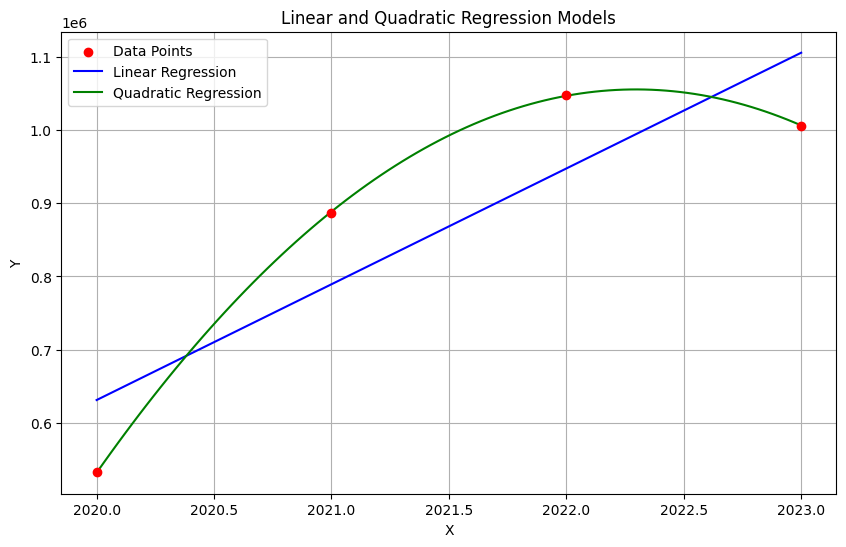

Predicted sales for 2024 using Linear Regression: 1263618.50
Predicted sales for 2024 using Quadratic Regression: 767329.75
Predicted sales for 2025 using Linear Regression: 1421721.00
Predicted sales for 2025 using Quadratic Regression: 329885.75


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Example data points (can be replaced with any data)
x_points = np.array([2023, 2022, 2021, 2020])
y_points = np.array([1005802, 1048040, 887200, 532407])

# Linear Regression: y = mx + b
# Using numpy's polyfit for degree 1 (linear)
linear_coeffs = np.polyfit(x_points, y_points, 1)
linear_model = np.poly1d(linear_coeffs)

# Quadratic Regression: y = ax^2 + bx + c
# Using numpy's polyfit for degree 2 (quadratic)
quadratic_coeffs = np.polyfit(x_points, y_points, 2)
quadratic_model = np.poly1d(quadratic_coeffs)

# Generate x values for smooth curve plotting
x_plot = np.linspace(min(x_points), max(x_points), 100)

# Generate y values from both models for plotting
y_linear = linear_model(x_plot)
y_quadratic = quadratic_model(x_plot)

# Plotting the data and regression models
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(x_points, y_points, color='red', label='Data Points', zorder=5)

# Plot Linear Regression line
plt.plot(x_plot, y_linear, label='Linear Regression', color='blue')

# Plot Quadratic Regression curve
plt.plot(x_plot, y_quadratic, label='Quadratic Regression', color='green')

# Display model coefficients in the legend
plt.legend()
plt.title("Linear and Quadratic Regression Models")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Predict for the year 2024 using Linear Regression
year_to_predict = 2024
linear_prediction = linear_model(year_to_predict)

# Predict for the year 2024 using Quadratic Regression
quadratic_prediction = quadratic_model(year_to_predict)

# Display the predictions
print(f"Predicted sales for {year_to_predict} using Linear Regression: {linear_prediction:.2f}")
print(f"Predicted sales for {year_to_predict} using Quadratic Regression: {quadratic_prediction:.2f}")

# Predict for the year 2025 using Linear Regression
year_to_predict = 2025
linear_prediction = linear_model(year_to_predict)

# Predict for the year 2025 using Quadratic Regression
quadratic_prediction = quadratic_model(year_to_predict)

# Display the predictions
print(f"Predicted sales for {year_to_predict} using Linear Regression: {linear_prediction:.2f}")
print(f"Predicted sales for {year_to_predict} using Quadratic Regression: {quadratic_prediction:.2f}")

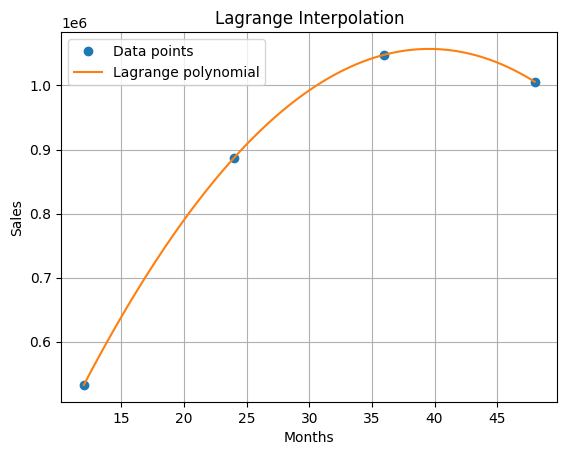

Predicted y at x = 5: 239504.5450424382
Predicted y at x = 17: 703222.8193479939


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x_points, y_points, x):
    n = len(x_points)  # Number of data points
    y = np.zeros_like(x, dtype=float)  # Initialize output y values

    for i in range(n):
        # Compute the Lagrange basis polynomial L_i(x)
        L_i = np.ones_like(x, dtype=float)
        for j in range(n):
            if i != j:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        # Add the contribution of y_i * L_i(x) to the total y
        y += y_points[i] * L_i

    return y

# Example Usage
# Given data points
# x_points = np.array([48, 36, 24, 12])
x_points = np.array([48, 36, 24, 12])
y_points = np.array([1005802, 1048040, 887200, 532407])

# Values to interpolate
x_new = np.linspace(min(x_points), max(x_points), 100)
y_new = lagrange_interpolation(x_points, y_points, x_new)

# Plotting the results
plt.plot(x_points, y_points, 'o', label='Data points')
plt.plot(x_new, y_new, label='Lagrange polynomial')
plt.legend()
plt.title("Lagrange Interpolation")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.grid()
plt.show()

x_predict1 = 5
y_predict1 = lagrange_interpolation(x_points, y_points, np.array([x_predict1]))
x_predict2 = 17
y_predict2 = lagrange_interpolation(x_points, y_points, np.array([x_predict2]))

print(f"Predicted y at x = {x_predict1}: {y_predict1[0]}")
print(f"Predicted y at x = {x_predict2}: {y_predict2[0]}")


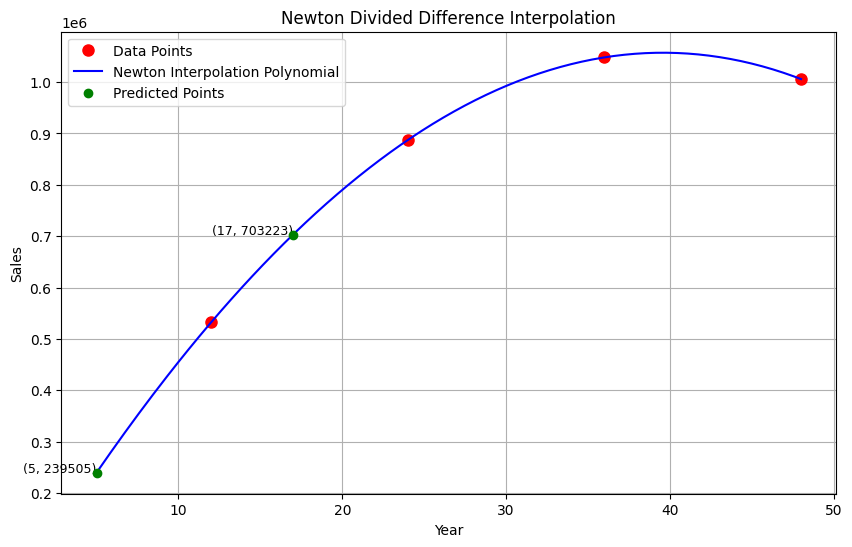

Newton Divided Difference Coefficients: [ 1.00580200e+06 -3.51983333e+03 -7.05131944e+02 -8.80111883e-01]
Predicted sales for May 5: 239504.55
Predicted sales for May 17: 703222.82


In [ ]:
import numpy as np

def newton_divided_difference(x_points, y_points):

    n = len(x_points)
    coef = np.zeros([n, n])
    coef[:, 0] = y_points  # First column is y-values

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_points[i+j] - x_points[i])

    return coef[0, :]  # Return the first row (coefficients of the polynomial)

def newton_polynomial(x_points, coef, x):
    n = len(coef)
    y = np.zeros_like(x, dtype=float)
    for i in range(n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_points[j])
        y += term
    return y

# Example Usage
# Data points
x_points = np.array([48, 36, 24, 12])
y_points = np.array([1005802, 1048040, 887200, 532407])

# Compute Newton Divided Difference coefficients
coefficients = newton_divided_difference(x_points, y_points)

# Predict sales for May 2020 and May 2021
x_predict = np.array([5, 17])
y_predict = newton_polynomial(x_points, coefficients, x_predict)

# Generate x values for plotting
x_plot = np.linspace(5, 48, 200)  # Smooth range for visualization
y_plot = newton_polynomial(x_points, coefficients, x_plot)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, 'o', label='Data Points', markersize=8, color='red')  # Original data points
plt.plot(x_plot, y_plot, label='Newton Interpolation Polynomial', color='blue')   # Polynomial curve
plt.scatter(x_predict, y_predict, color='green', label='Predicted Points', zorder=5)  # Predictions
for year, sales in zip(x_predict, y_predict):
    plt.text(year, sales, f"({year}, {sales:.0f})", fontsize=9, ha='right')

plt.title("Newton Divided Difference Interpolation")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

# Display results
print(f"Newton Divided Difference Coefficients: {coefficients}")
for year, sales in zip(x_predict, y_predict):
    print(f"Predicted sales for May {year}: {sales:.2f}")
